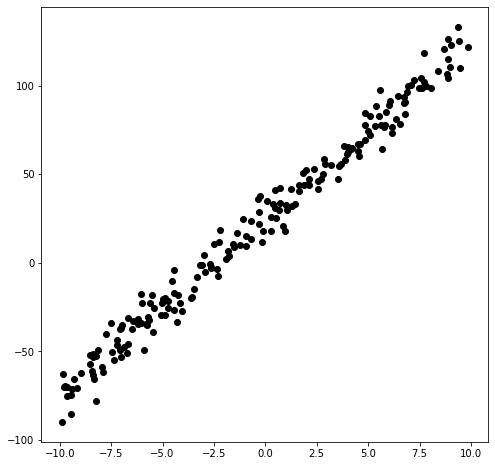

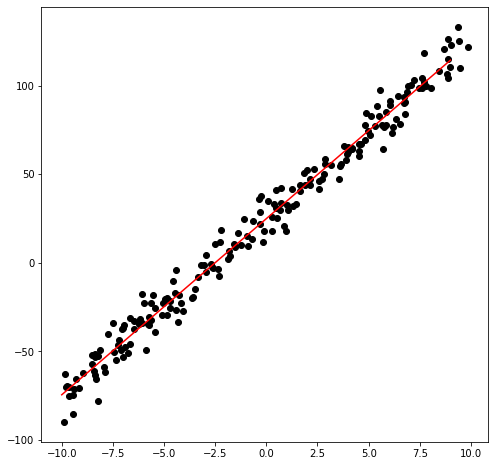

In [11]:
import numpy as np
import matplotlib.pyplot as plt


# cost function
def compute_cost(theta, x, y):
  m=float(len(y))
  prediction=theta[0]+theta[1]*x
  J=(1/2)*(1/m)*(np.sum(np.square(prediction-y)))
  return J
  
# get theta, theta_history, J_history
def compute_theta(theta, data_x, data_y, num):
  n = float(len(data_x))
  J_history=np.zeros(num)
  theta_history=np.zeros((num,2))

  for i in range(num):
    prediction=theta[1]*data_x+theta[0]
    loss=prediction - data_y
    t0 = alpha*(1/n)*np.sum(loss)
    t1 = alpha*(1/n)*np.sum(loss*data_x)
  

    theta[0]-=t0
    theta[1]-=t1

    J_history[i]=compute_cost(theta,data_x,data_y)
    theta_history[i,0]=theta[0]
    theta_history[i,1]=theta[1]

  return theta, theta_history, J_history

# 데이터 불러오기
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, c='black')
plt.show()


#y = Theta0 + Theta1 * x
theta=[-30, -30]
alpha=0.01
num=3000

theta, theta_h, cost_h = compute_theta(theta, x_data, y_data, num)

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, c='black')
w = range(-10, 10)
q = [theta[1]*v+theta[0] for v in w]
plt.plot(w, q, c='red')
plt.show()



